In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_rides = pd.merge(city_data, ride_data, on='city')
# Display the data table for preview
city_rides.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

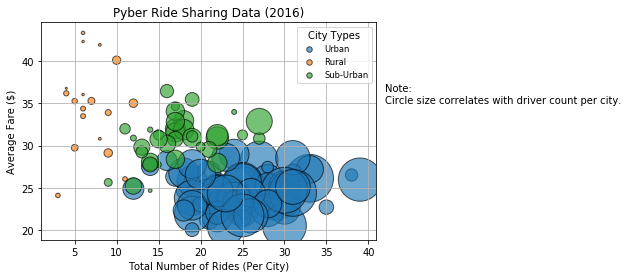

In [39]:
# Obtain the x and y coordinates for each of the three city types
urban_city_rides = city_rides[city_rides['type'] == 'Urban']
urban_city_rides.name='Urban'
rural_city_rides = city_rides[city_rides['type'] == 'Rural']
rural_city_rides.name='Rural'
suburban_city_rides = city_rides[city_rides['type'] == 'Suburban']
suburban_city_rides.name = 'Sub-Urban'
areas= [urban_city_rides,rural_city_rides,suburban_city_rides]
for area in areas:
    avg_fare_per_city = area.groupby(['city']).mean()['fare']
    total_rides_per_city = area.groupby(['city']).count()['ride_id']
    total_drivers_per_city = area.groupby(['city']).sum()['driver_count']
    plt.scatter(total_rides_per_city,avg_fare_per_city, s=total_drivers_per_city,marker='o',
                edgecolor='black', alpha=0.65, linewidths=1,label=area.name)

# Build the scatter plots for each city types
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
# Incorporate the other graph properties
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("City_Rides_Scatter.png")

In [40]:
# Show plot
plt.show()

## Total Fares by City Type

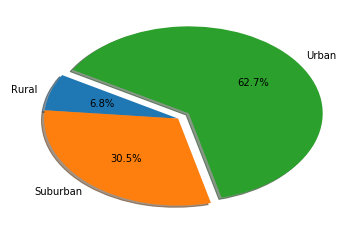

In [51]:
# Calculate Type Percents
type_percent = (city_rides.groupby(['type']).sum()['fare']/city_rides['fare'].sum())*100
# Build Pie Chart
plt.pie(type_percent,labels=["Rural", "Suburban", "Urban"],explode=[0, 0, 0.1],autopct='%1.1f%%', 
        shadow=True, startangle=150)
# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

In [52]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x1227b0828>,
 [Text(-1.03016,0.385701,'Rural'),
  Text(-0.886342,-0.651459,'Suburban'),
  Text(1.07071,0.54184,'Urban')],
 [Text(-0.561907,0.210383,'5.3%'),
  Text(-0.483459,-0.355341,'26.3%'),
  Text(0.624578,0.316073,'68.4%')])

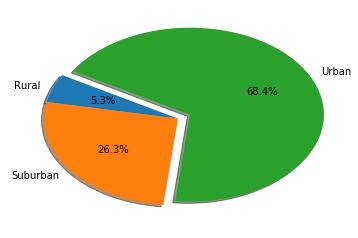

In [53]:
# Calculate Ride Percents
ride_type_percent = (city_rides.groupby(['type']).count()['ride_id']/city_rides['ride_id'].count())*100
# Build Pie Chart
plt.pie(ride_type_percent,labels=["Rural", "Suburban", "Urban"],explode=[0, 0, 0.1],autopct='%1.1f%%', 
        shadow=True, startangle=150)
# Save Figure


In [54]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x122959f98>,
 [Text(-0.965844,0.526446,'Rural'),
  Text(-1.09625,0.0908056,'Suburban'),
  Text(1.19311,-0.128391,'Urban')],
 [Text(-0.526824,0.287153,'0.8%'),
  Text(-0.597952,0.0495303,'12.5%'),
  Text(0.695982,-0.0748949,'86.7%')])

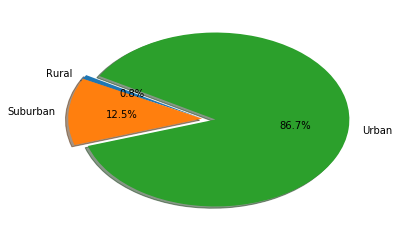

In [55]:
# Calculate Driver Percents
drivers_type_percent = (city_rides.groupby(['type']).sum()['driver_count']/city_rides['driver_count'].sum())*100
# Build Pie Charts
plt.pie(drivers_type_percent,labels=["Rural", "Suburban", "Urban"],explode=[0, 0, 0.1],autopct='%1.1f%%', 
        shadow=True, startangle=150)
# Save Figure


In [56]:
# Show Figure
plt.show()